# Logistic Regression

Logistic regression (also called logit regression) is commonly used to
estimate the probability that an instance belongs to a particular class (e.g., what is
the probability that this email is spam?). 

If the estimated probability is greater than a
given threshold (typically 50%), then the model predicts that the instance belongs to
that class (called the positive class, labeled “1”), and otherwise it predicts that it does
not (i.e., it belongs to the negative class, labeled “0”). 

This makes it a binary classifier.

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

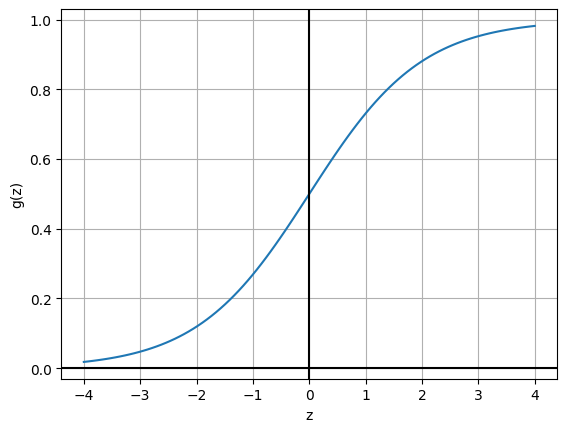

In [43]:
# Logistic Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# create a range of values from -4 to 4 with 100 steps in between
# apply the sigmoid function to each point (step) in the range
z = np.linspace(-4, 4, 100)
g_z = sigmoid(z)

# plot the sigmoid function
plt.plot(z, g_z)

plt.xlabel('z')
plt.ylabel('g(z)')
plt.grid(True)
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.show()

# Decision Boundary

We will use the iris dataset to illustrate logistic regression. 
This is a famous dataset that contains the **sepal** and **petal** **length** and **width** of 150 iris flowers of three different species: **Iris setosa**, **Iris versicolor**, and **Iris virginica**.

Let’s try to build a classifier to detect the Iris virginica type based only on the **petal width** feature. The first step is to load the data and take a quick peek:

In [44]:
# load iris data set as pandas dataframe
iris = datasets.load_iris(as_frame=True)
print(iris.data.head(), "\n")
iris.data.info()

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [45]:
# show target
print(iris.target.head(), "\n")

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64 



In [46]:
# show target names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [47]:
# X should contain petal length and petal width
# y should be 1 if target is virginica, 0 otherwise
# we set y as boolean for binary classification
# we use numpy array instead of pandas dataframe

X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris.target_names[iris.target] == 'virginica'
print(X[:10], "\n")
print(y[:10])

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]] 

[False False False False False False False False False False]


In [48]:
log_reg = LogisticRegression() #automatically adds the dummy feature for you
log_reg.fit(X, y)

LogisticRegression()

In [49]:
# show intercept and coefficients
log_reg.intercept_, log_reg.coef_

(array([-17.55616979]), array([[2.77983942, 2.38388751]]))

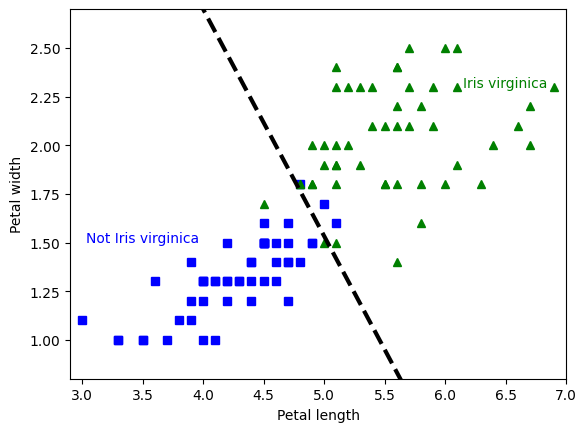

In [50]:
# for plotting the decision boundary, we need two points
# create two x1 values, say 2.9 and 7 (min and max of petal length)
# then calculate x2 values using the decision boundary equation
two_x1 = np.array([2.9, 7])

# These just get teh 3 values we printed in the code above
theta_0 = log_reg.intercept_[0] # intercept is a 1D array with one element
theta_1 = log_reg.coef_[0, 0] # coef_ is a 2D array with one row and two columns
theta_2 = log_reg.coef_[0, 1] # coef_ is a 2D array with one row and two columns

two_x2 = -(theta_0 + theta_1 * two_x1) / theta_2


# plot the training instances of class 0 as blue squares (bs)
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs")

# plot the training instances of class 1 as green triangles (g^)
plt.plot(X[y == 1, 0], X[y == 1, 1], "g^")

# plot the decision boundary as a k-- line. k-- is black dashed line
plt.plot(two_x1, two_x2, "k--", linewidth=3)

# show text labels for the class 0 and class 1
plt.text(3.5, 1.5, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")

# show the xlabel and ylabel
plt.xlabel("Petal length")
plt.ylabel("Petal width")

# show the axes from 2.9 to 7 and 0.8 to 2.7
# these are the min and max values of petal length and petal width
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

In [51]:
# create a new instance with petal length 6 and petal width 2
# predict the class of the new instance

log_reg.predict([[6, 2]])

array([ True])

In [52]:
# show probability of the new instance being class 0 and class 1

log_reg.predict_proba([[6, 2]])

array([[0.02002311, 0.97997689]])

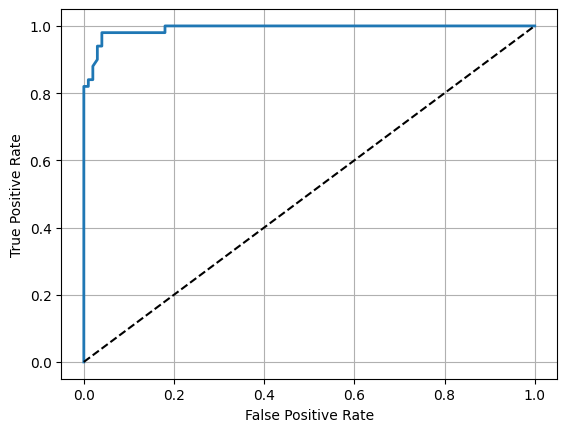

In [53]:
# build roc curve using cross_val_predict

y_scores = cross_val_predict(log_reg, X, y, cv=3, method="decision_function")
fpr, tpr, thresholds = roc_curve(y, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)

plot_roc_curve(fpr, tpr)

In [54]:
# show confusion matrix using cross_val_predict

y_pred = cross_val_predict(log_reg, X, y, cv=3)
confusion_matrix(y, y_pred)

array([[96,  4],
       [ 2, 48]])

In [55]:
# show confusion matrix using cross_val_predict for a different threshold

y_scores = cross_val_predict(log_reg, X, y, cv=3, method="decision_function")

# set threshold to 0.8
y_pred = (y_scores > 0.8)
confusion_matrix(y, y_pred)

array([[100,   0],
       [  9,  41]])

In [56]:
# show precision and recall for threshold 0.8

print(precision_score(y, y_pred), ",", recall_score(y, y_pred))
# This shows that if we guess true, we're always correct. However, we miss some true values, guessing false

1.0 , 0.82


The numbers are obtained as follows. 

41/(41+0) = 1.0

41/(41+9) = 0.82

Remember that sckit-learn orders the confusion matrix by the bigger class, so in order to see the 'virginica' class, consider the second row, second column. 